In [1]:
#imports
import math
import random
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
import collections
from operator import itemgetter
import geopandas
from matplotlib.colors import ListedColormap
import sys
import gc
import pylab

## Data importing and preprocessing

In [2]:
# listing the Excels Files

excel_list1 = os.listdir("Raw_Data")
excel_list = []
for i in excel_list1:
    if(i.endswith(".csv")):
        excel_list.append(i)   
excel_list.sort()

## Directed Weighted Network Creation

In [3]:
# Creating networks and stroing them
coordinates = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0,index_col= 0)
print(coordinates)

max_weight = 0
min_weight = 10000000000

graphs = []
passengers = []   # records number of total passengers(month wise)
lbls = []
for i in excel_list:
    path = "Raw_Data/"+i
    excel = pd.read_csv(path ,header=0, index_col=0, usecols = [0,1,2,3,4] ,names=["SNo","city1","city2","to","from"] )
    passengers.append(sum(excel["to"]) + sum(excel["from"]))
    lbls.append(i[:-4])
    G = nx.DiGraph()
    cities = {}
    for i in range(1,len(excel)+1):
        cities[excel["city1"][i]] = (coordinates["Longitude"][excel["city1"][i]],coordinates["Latitude"][excel["city1"][i]])
        cities[excel["city2"][i]] = (coordinates["Longitude"][excel["city2"][i]],coordinates["Latitude"][excel["city2"][i]])
    for i in cities:
        G.add_node(i, pos= cities[i])
    
    print(path)
    for i in range(1,len(excel)+1):
        weight1 = excel["to"][i]
        if(weight1 != 0):
            G.add_edge(excel["city1"][i],excel["city2"][i],weight=weight1)
        weight2 = excel["from"][i]
        if(weight2 != 0):
            G.add_edge(excel["city2"][i],excel["city1"][i],weight=weight2)
        
        max_weight = max(max_weight, weight1, weight2)
        min_weight = min(min_weight, weight1, weight2)
    graphs.append(G)
#print(cities)

               Latitude  Longitude
Cities                            
ADAMPUR          31.430     75.750
AGARTALA         23.887     91.240
AGATTI ISLAND    10.824     72.176
AGRA             27.156     77.961
AHMEDABAD        23.077     72.635
...                 ...        ...
VADODARA         22.336     73.226
VARANASI         25.452     82.859
VIDYANAGAR       15.170     76.620
VIJAYAWADA       16.530     80.797
VISAKHAPATNAM    17.721     83.224

[119 rows x 2 columns]
Raw_Data/1505.csv
Raw_Data/1506.csv
Raw_Data/1507.csv
Raw_Data/1508.csv
Raw_Data/1509.csv
Raw_Data/1510.csv
Raw_Data/1511.csv
Raw_Data/1512.csv
Raw_Data/1601.csv
Raw_Data/1602.csv
Raw_Data/1603.csv
Raw_Data/1604.csv
Raw_Data/1605.csv
Raw_Data/1606.csv
Raw_Data/1607.csv
Raw_Data/1608.csv
Raw_Data/1609.csv
Raw_Data/1610.csv
Raw_Data/1611.csv
Raw_Data/1612.csv
Raw_Data/1701.csv
Raw_Data/1702.csv
Raw_Data/1703.csv
Raw_Data/1704.csv
Raw_Data/1705.csv
Raw_Data/1706.csv
Raw_Data/1707.csv
Raw_Data/1708.csv
Raw_Data/1709.csv

In [4]:
lbls1 = []
month = {"01":"Jan", "02":"Feb", "03":"March", "04":"April", "05":"May", "06":"June", "07":"July", "08":"Aug", 
        "09":"Sep", "10":"Oct", "11":"Nov", "12":"Dec"}
for e in lbls:
    lbls1.append(month[e[2:]]+e[:2])

In [5]:
# coordinates has city, lat, long -> <class 'pandas.core.frame.DataFrame'>

df = geopandas.read_file("shapefile/india_states.shp")


In [6]:
print(df)

               ST_NM  ST_ID  ID  \
0    Jammu & Kashmir  IN-JK  JK   
1            Gujarat  IN-GJ  GJ   
2            Gujarat  IN-GJ  GJ   
3            Gujarat  IN-GJ  GJ   
4            Gujarat  IN-GJ  GJ   
..               ...    ...  ..   
266           Odisha  IN-OR  OR   
267        Jharkhand  IN-JH  JH   
268     NCT of Delhi  IN-DL  DL   
269        Telangana  IN-TG  TG   
270       Puducherry  IN-PY  PY   

                                              geometry  
0    MULTIPOLYGON (((75.88864 32.57603, 75.84635 32...  
1    POLYGON ((72.67653 21.15570, 72.70319 21.14625...  
2    POLYGON ((72.35319 21.61347, 72.36291 21.60069...  
3    POLYGON ((72.72264 21.66597, 72.74597 21.65875...  
4    POLYGON ((72.27431 21.74958, 72.28264 21.73458...  
..                                                 ...  
266  POLYGON ((87.49020 21.60265, 87.47440 21.59988...  
267  POLYGON ((83.50607 24.52589, 83.55031 24.52505...  
268  POLYGON ((77.34765 28.50346, 77.31673 28.48519...  
269  POLY

colors = ['#fafa6e','#72cf85', '#00ffff','#00968e', '#1b6474','#9966ff','#ff66cc','#993366',
          '#ff5050','#ff3300','#cc3300','#993300','#800000',]


for i in range(len(lbls)):
    print(i)
    df.boundary.plot()

    #cmap = ListedColormap(['#fafa6e', '#e1f470','#c9ee73', '#b2e777', '#9cdf7c', '#86d780', '#72cf85', '#5ec688', '#4abd8c', '#37b38e',
    #     '#23aa8f', '#0ba08f', '#00968e', '#008c8b', '#008288', '#007882', '#106e7c', '#1b6474', '#225b6c', '#275162',
    #     '#2a4858'])
    cmap = ListedColormap(colors)
    
#     edges, weights = zip(*nx.get_edge_attributes(graphs[i],'weight').items())
#     nx.draw(graphs[i], nx.get_node_attributes(graphs[i],'pos'),node_size = 50, node_color='b', edgelist=edges, 
#         edge_color=weights, width=1.0, edge_cmap=cmap, vmin=min_weight, vmax=max_weight)

    try:
        edges, weights = zip(*nx.get_edge_attributes(graphs[i],'weight').items())
        nx.draw(graphs[i], nx.get_node_attributes(graphs[i],'pos'),node_size = 50, node_color='b', edgelist=edges, 
            edge_color=weights, width=1.0, edge_cmap=cmap, vmin=min_weight, vmax=max_weight)
    except:
        print("HAHAHA")
        nx.draw_networkx(graphs[i],nx.get_node_attributes(graphs[i],'pos'),font_color = "red")
    
    

#     figure.set_size_inches(100, 100)
    
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = min_weight, vmax=max_weight))
    sm._A = []
    cb = plt.colorbar(sm)
    cb.ax.tick_params(labelsize=15) 
    cb.set_label(label='Number of Passengers',weight='bold',size = 20)

    


    plt.title("Airport Network Of India "+ lbls1[i])
    
    figure = plt.gcf()
    figure.set_size_inches(30, 30)
    
    plt.savefig('Output_Files/matplotlib/map/'+lbls[i])
    #plt.savefig(lbls[i])
 
    #plt.show()
    plt.clf()
    plt.close()


## Network Visualization

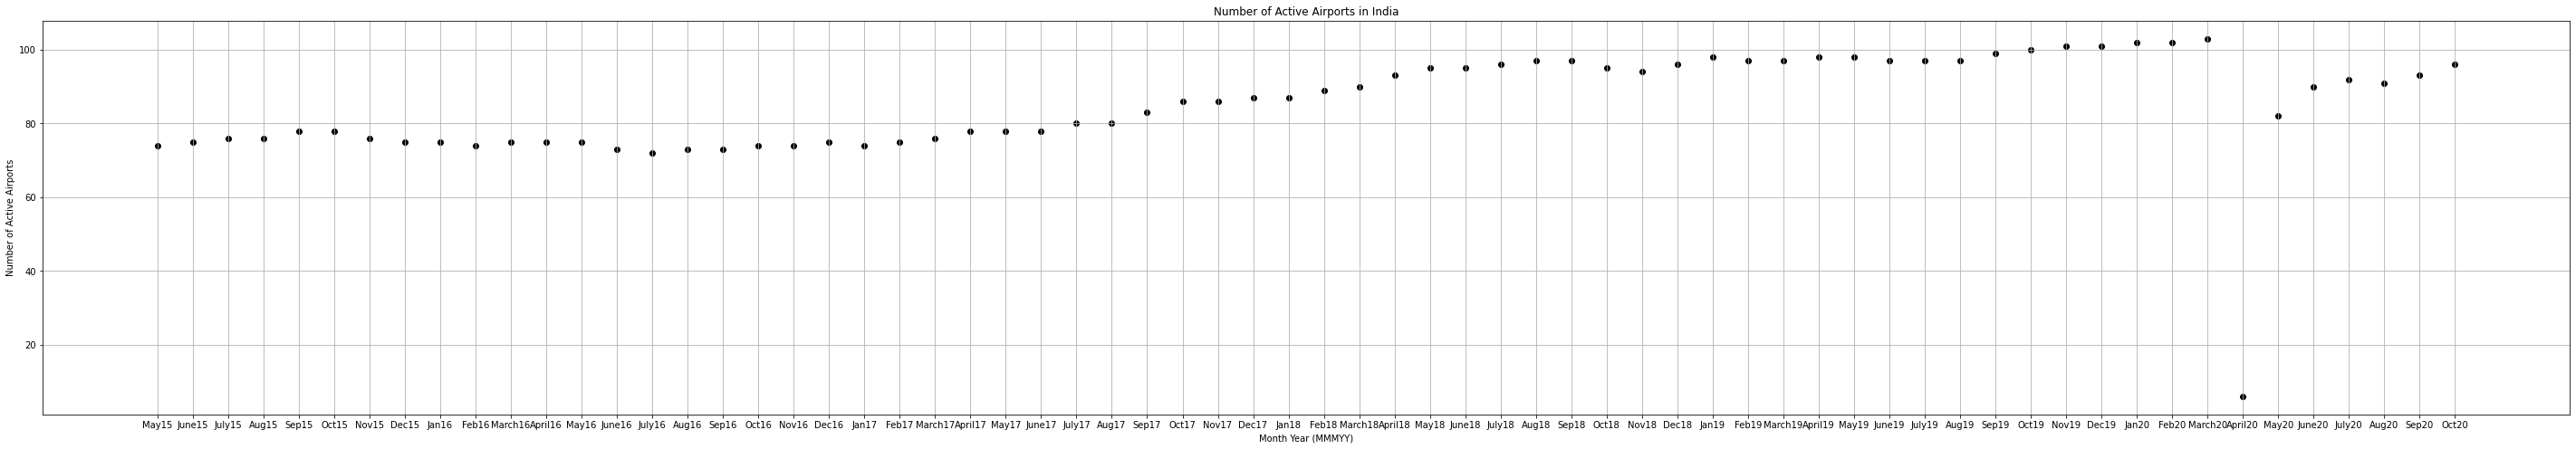

In [7]:
nodes = []
for i in range(len(graphs)):
    nodes.append(len(graphs[i].nodes()))
plt.scatter(lbls1, nodes, color="black", marker="o")
plt.xlabel("Month Year (MMMYY)")

plt.xticks([i for i in range(66)], labels = lbls1)
plt.ylabel("Number of Active Airports")
plt.title("Number of Active Airports in India")
plt.grid(True)

figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/nodes')
plt.show()

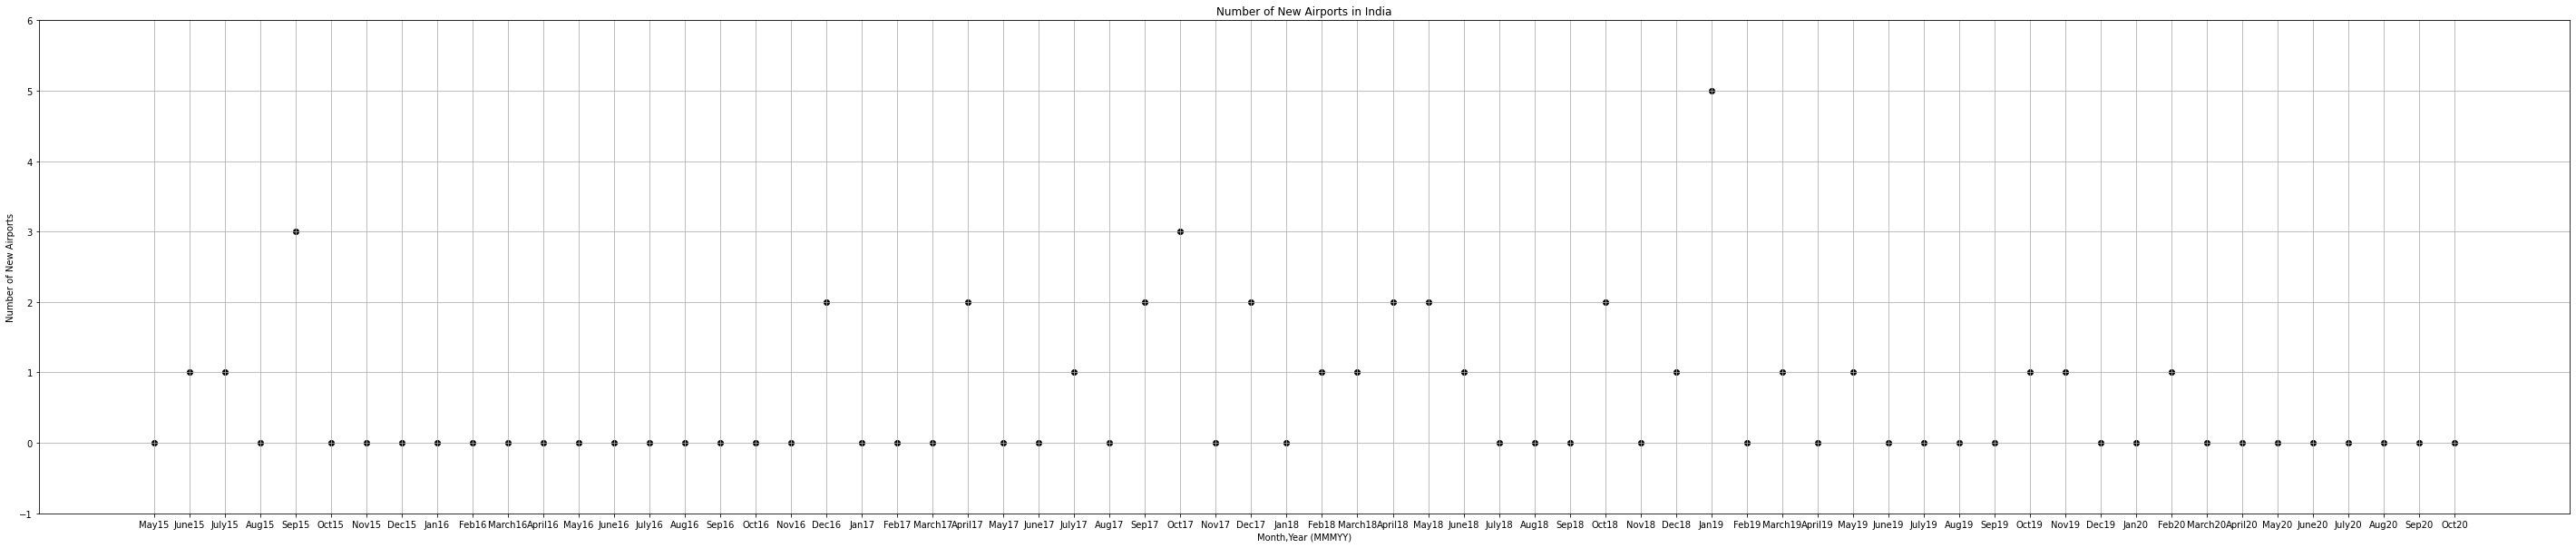

In [8]:
nnodes = []
airpor = {} 
for i in range(len(graphs)):
    temp = 0
    for j in graphs[i].nodes():
        if j not in airpor:
            airpor[j]=  1
            temp += 1
    nnodes.append(temp)
nnodes[0] = 0
plt.scatter(lbls1, nnodes, color="black", marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(66)], labels = lbls1)
plt.ylabel("Number of New Airports")
plt.title("Number of New Airports in India")
plt.grid(True)
plt.ylim(-1,6)
figure = plt.gcf()
figure.set_size_inches(50, 10)
plt.savefig('Output_Files/matplotlib/newnodes')
plt.show()
plt.clf()
plt.close()

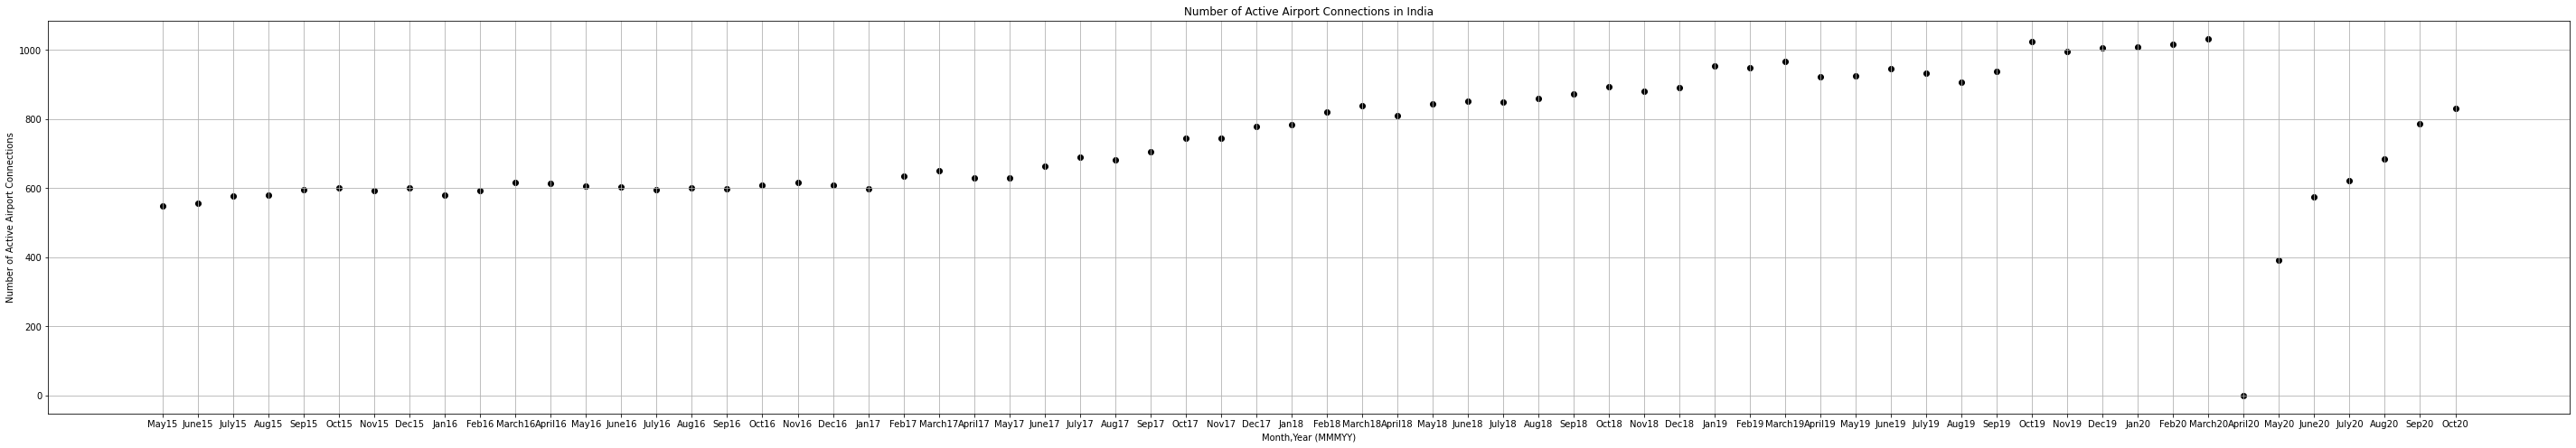

In [9]:
edges = []
for i in range(len(graphs)):
    edges.append(len(graphs[i].edges()))
plt.scatter(lbls1, edges, color="black", marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(66)], labels = lbls1)
plt.ylabel("Number of Active Airport Connections")
plt.title("Number of Active Airport Connections in India")
plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/edges')
plt.show()
plt.clf()
plt.close()

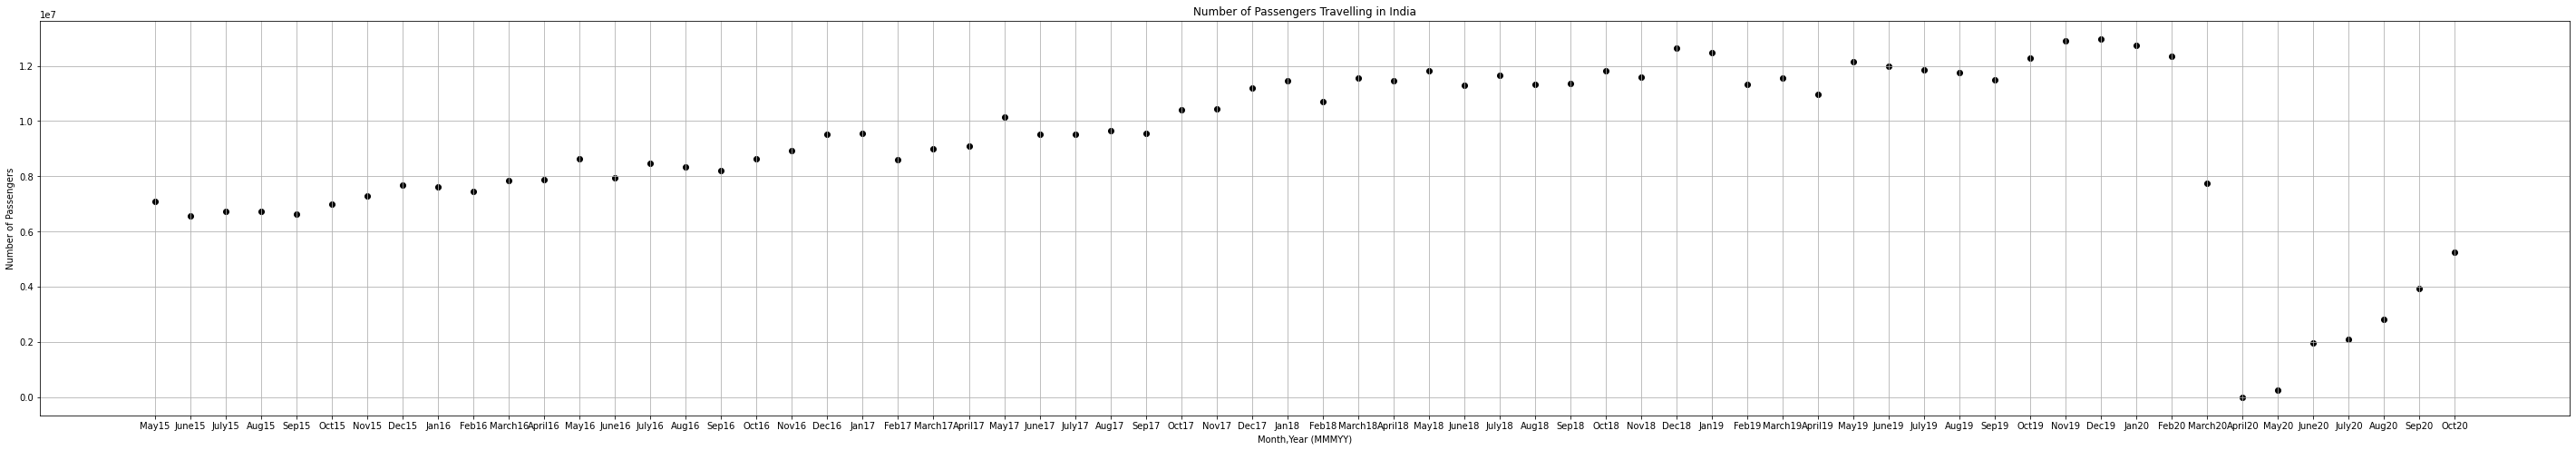

In [10]:
plt.scatter(lbls1, passengers, color="black",  marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(66)],labels = lbls1)
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers Travelling in India")
plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/passengers')
plt.show()
plt.clf()
plt.close()

excel = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0)
tempcity = list(excel["Cities"])
#print(tempcity)
for i in sorted(airpor.keys()):
    if i not in tempcity:
        print(i)

In [11]:
for i in range(len(graphs)):
    print(lbls1[i])
    G = graphs[i]
    betweenness_dict = nx.betweenness_centrality(G)
    nx.set_node_attributes(G, betweenness_dict, 'betweenness')
    
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

#     sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

    print("Top 10 nodes")
    
    for i in range(len(sorted_betweenness[:10])):
        print(sorted_betweenness[i][0] + " -> " + str(sorted_betweenness[i][1]))


May15
Top 10 nodes
DELHI -> 0.35088642067808723
MUMBAI -> 0.2462499554394531
KOLKATA -> 0.14229527765486671
BENGALURU -> 0.12847787254179963
CHENNAI -> 0.09071295217128547
GUWAHATI -> 0.06162531447919573
HYDERABAD -> 0.04865761880602063
KOCHI -> 0.0279885766187136
SILCHAR -> 0.0273972602739726
AHMEDABAD -> 0.00892063262925135
June15
Top 10 nodes
DELHI -> 0.347284328962411
MUMBAI -> 0.240014704227033
BENGALURU -> 0.15818270955257266
KOLKATA -> 0.13654468757208485
CHENNAI -> 0.08676250833785078
GUWAHATI -> 0.06227147168927988
HYDERABAD -> 0.04598120625517885
KOCHI -> 0.02760236184893719
SILCHAR -> 0.02702702702702703
AHMEDABAD -> 0.008529895687429935
July15
Top 10 nodes
DELHI -> 0.33858513183513167
MUMBAI -> 0.22533362558362557
BENGALURU -> 0.16823499273499282
KOLKATA -> 0.13308620958620956
CHENNAI -> 0.08914823564823564
GUWAHATI -> 0.061061578061578047
HYDERABAD -> 0.04735814210814211
KOCHI -> 0.028210214210214208
SILCHAR -> 0.02666666666666667
VARANASI -> 0.018153796653796652
Aug15
Top

Top 10 nodes
DELHI -> 0.39967142010661577
MUMBAI -> 0.1664644172097632
HYDERABAD -> 0.10604947770924211
BENGALURU -> 0.09870470321497628
KOLKATA -> 0.09770536952470732
CHENNAI -> 0.0747777400294388
GUWAHATI -> 0.06771880906364847
KOCHI -> 0.02668040501687118
INDORE -> 0.013994605019041113
KHAJURAHO -> 0.01298701298701299
July17
Top 10 nodes
DELHI -> 0.3871718305173114
MUMBAI -> 0.21212088917355543
HYDERABAD -> 0.09928983148024903
BENGALURU -> 0.09359646352887668
KOLKATA -> 0.08833809465360526
CHENNAI -> 0.07064204298045013
GUWAHATI -> 0.0643804467197846
KOCHI -> 0.02640051097794954
INDORE -> 0.014148534937239901
KHAJURAHO -> 0.012658227848101266
Aug17
Top 10 nodes
DELHI -> 0.3697375078797266
MUMBAI -> 0.21348019672200608
HYDERABAD -> 0.12218419387071655
BENGALURU -> 0.09682385142642033
KOLKATA -> 0.09048686707379924
CHENNAI -> 0.07130890244721222
GUWAHATI -> 0.0632748580533391
KOCHI -> 0.026196109191269273
INDORE -> 0.014212364054136204
KHAJURAHO -> 0.012658227848101266
Sep17
Top 10 no

Top 10 nodes
DELHI -> 0.3016911375106036
MUMBAI -> 0.19450626938075913
KOLKATA -> 0.13427899189841874
BENGALURU -> 0.1062107617312732
HYDERABAD -> 0.10327370165978081
CHENNAI -> 0.0732374363018449
AHMEDABAD -> 0.058385053044127305
JAIPUR -> 0.029188129997682746
DEHRA DUN -> 0.023810902984811453
GUWAHATI -> 0.01857566881547159
Oct19
Top 10 nodes
DELHI -> 0.3043549222097024
MUMBAI -> 0.19028950066332406
KOLKATA -> 0.12113520853967628
HYDERABAD -> 0.10239186849555214
BENGALURU -> 0.10157422514594244
CHENNAI -> 0.06633955298434248
AHMEDABAD -> 0.04886561659496043
DEHRA DUN -> 0.04321027297217772
GUWAHATI -> 0.02419544760875385
PITHORAGARH -> 0.020202020202020197
Nov19
Top 10 nodes
DELHI -> 0.3004775012986095
MUMBAI -> 0.18929624412259105
BENGALURU -> 0.12626545663891467
KOLKATA -> 0.12230759410048259
HYDERABAD -> 0.1082019677469551
CHENNAI -> 0.06773797987265164
AHMEDABAD -> 0.041482085114725
GUWAHATI -> 0.024971958102566034
DEHRA DUN -> 0.02337535268751846
JAIPUR -> 0.023120821986997518
D

April20
{'May15': -0.527281220620641, 'June15': -0.5317350274510817, 'July15': -0.526240581396477, 'Aug15': -0.5232407383515175, 'Sep15': -0.5391388879882293, 'Oct15': -0.5303208579477606, 'Nov15': -0.5250046554724086, 'Dec15': -0.5421556462374971, 'Jan16': -0.535574846787293, 'Feb16': -0.5226373743711228, 'March16': -0.5182753523143475, 'April16': -0.5060782208907413, 'May16': -0.509783658853313, 'June16': -0.5103966118593453, 'July16': -0.5038931031701285, 'Aug16': -0.49817165061502466, 'Sep16': -0.5077600885280492, 'Oct16': -0.5122172164780205, 'Nov16': -0.5140104008074059, 'Dec16': -0.5093456014534161, 'Jan17': -0.5156092267895523, 'Feb17': -0.4991351344789585, 'March17': -0.4865157442844168, 'April17': -0.5050275841039457, 'May17': -0.5157438533952858, 'June17': -0.48635071396104734, 'July17': -0.47221331200811056, 'Aug17': -0.481395074150441, 'Sep17': -0.4824416986593381, 'Oct17': -0.4829849198729212, 'Nov17': -0.4828286805734259, 'Dec17': -0.4837340542799736, 'Jan18': -0.4936365

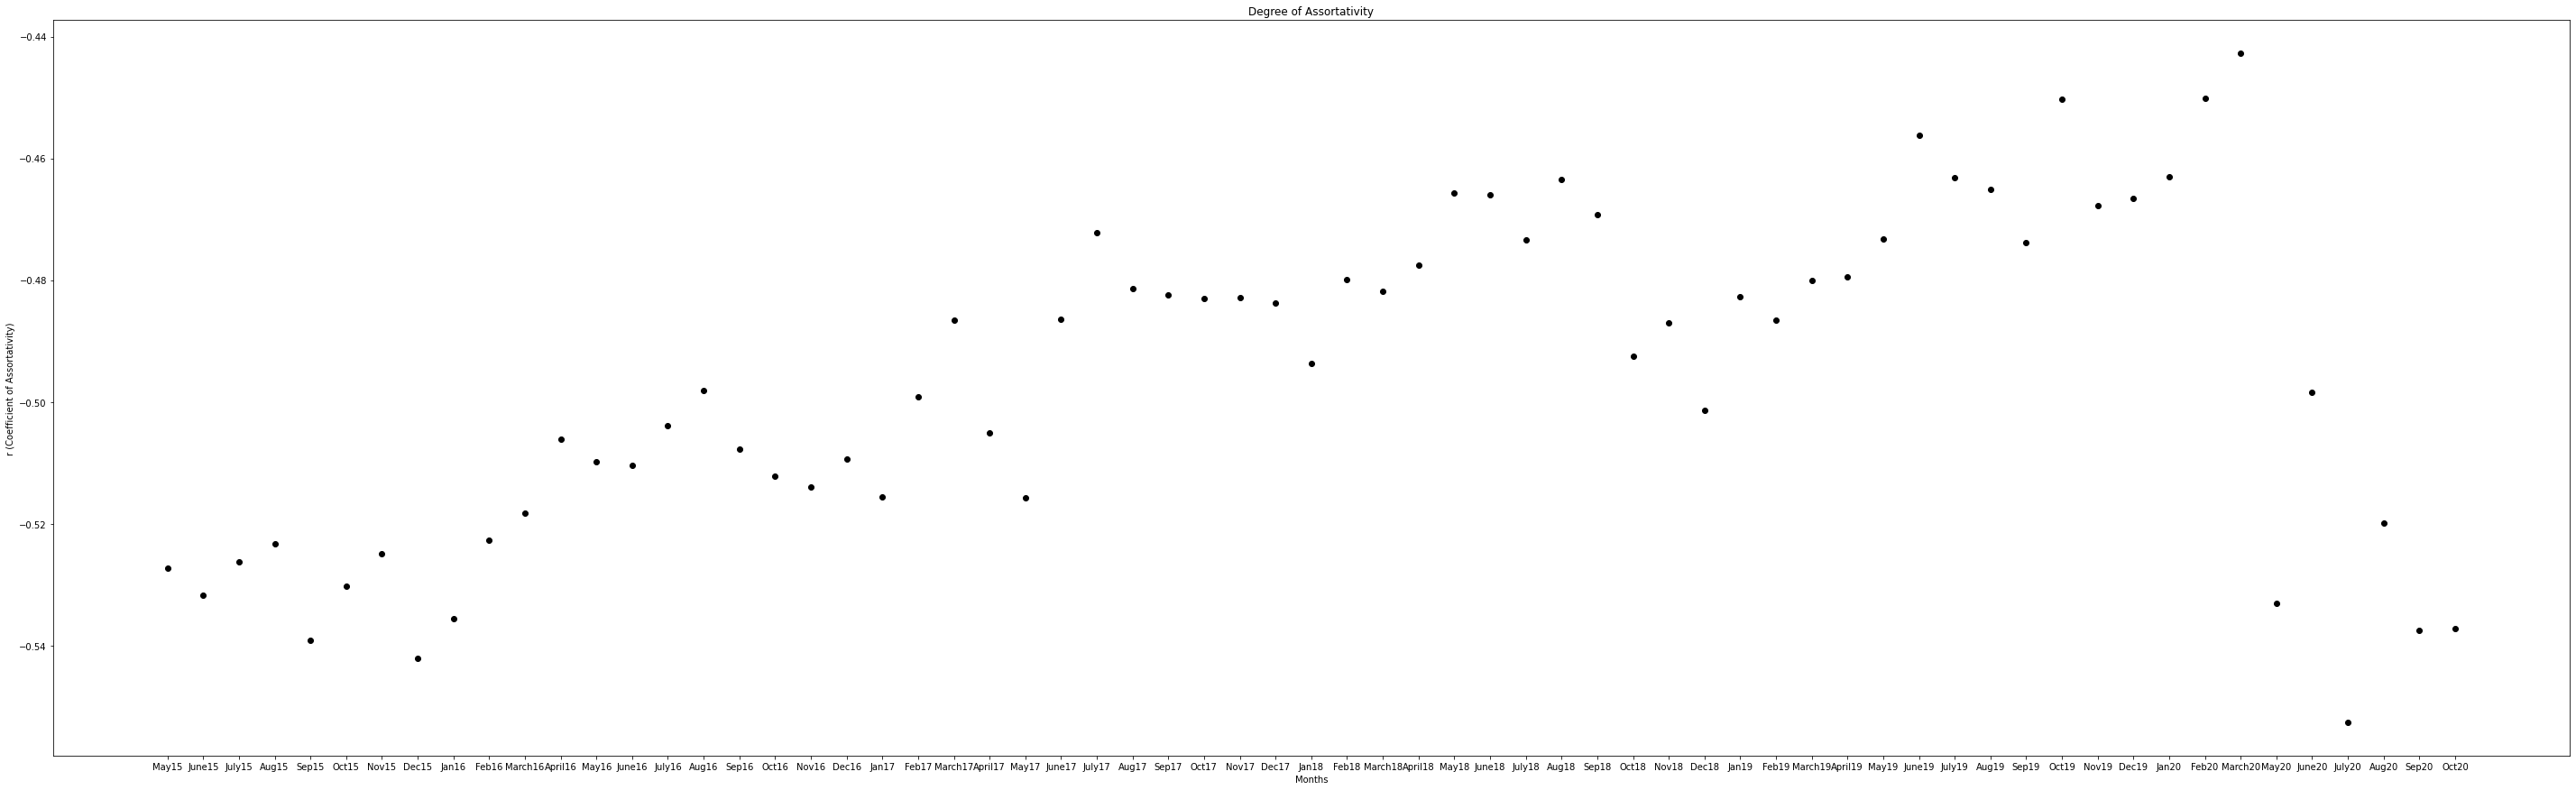

In [12]:
assortativity = {}
for i in range(len(graphs)):
    G = graphs[i]
    try:
        pearson = nx.degree_pearson_correlation_coefficient(G)
        assortativity[lbls1[i]] = pearson 
    except:
        print(lbls1[i])
print(assortativity)
plt.figure(figsize = (50, 15)) 
# plt.bar(range(len(assortativity)), list(assortativity.values()), align='center')
plt.scatter(range(len(assortativity)), list(assortativity.values()), color="black",  marker="o")
plt.title("Degree of Assortativity")
plt.xlabel("Months")
plt.ylabel("r (Coefficient of Assortativity)")
plt.xticks(range(len(assortativity)), list(assortativity.keys()))
plt.savefig('Output_Files/matplotlib/Assortativity')
plt.show()
    

Degree Distribution

May15


Average clustering coefficient for July17 is 0.6498709231340716
June15


Average clustering coefficient for Aug17 is 0.6434613629926142
July15


Average clustering coefficient for Sep17 is 0.6136858940651846
Aug15


Average clustering coefficient for July17 is 0.6425104965289116
Sep15


Average clustering coefficient for Aug17 is 0.6937912813593201
Oct15


Average clustering coefficient for Nov17 is 0.6373241272214337
Nov15


Average clustering coefficient for July17 is 0.6046984457370973
Dec15


Average clustering coefficient for Dec17 is 0.6894202575685523
Jan16


Average clustering coefficient for Sep17 is 0.69369373832812
Feb16


Average clustering coefficient for Oct17 is 0.6966290773198501
March16


Average clustering coefficient for Aug17 is 0.6595565049614662
April16


Average clustering coefficient for July17 is 0.6321229251222374
May16


Average clustering coefficient for Dec17 is 0.6319548680423022
June16


Average clustering coefficient for Oct17 is 0.63632814176910

c:\users\juhi pandey\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:76: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
c:\users\juhi pandey\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:95: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


Average clustering coefficient for May15 is 0.0
May20


Average clustering coefficient for Jan17 is 0.5005764888525713
June20


Average clustering coefficient for Sep17 is 0.6027726144275517
July20


Average clustering coefficient for Aug17 is 0.677371907272084
Aug20


Average clustering coefficient for Oct17 is 0.635837175733831
Sep20


Average clustering coefficient for Dec17 is 0.7251840703446114
Oct20


Average clustering coefficient for April18 is 0.6834669876143319


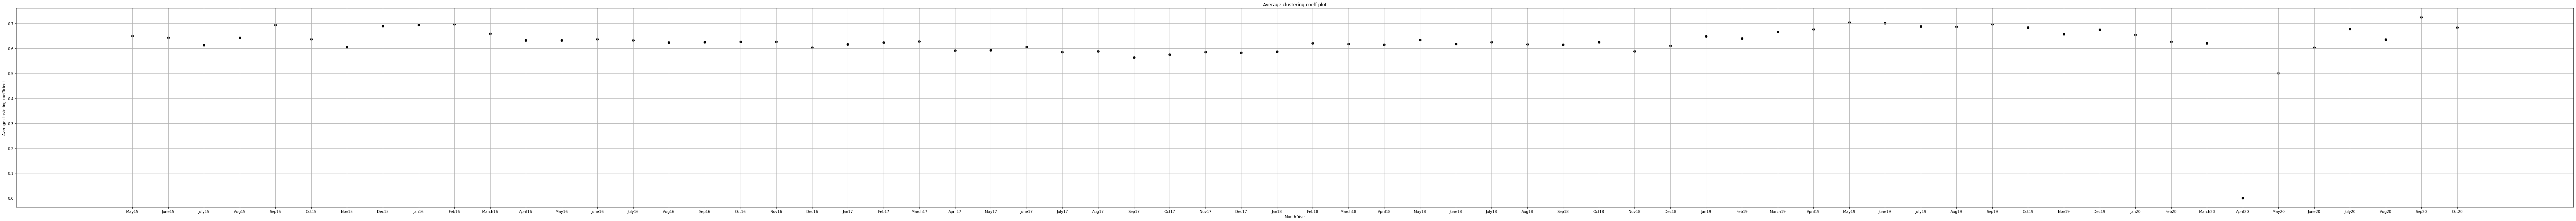

7040

In [35]:
avg_clust_coeff_list = []
def haha(i):
    print(lbls1[i])
    G = graphs[i]
    degree_dict = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, degree_dict, 'degree')
   
    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    
    
    plt.figure(figsize = (100, 10))
    plt.scatter([y[0] for y in sorted_degree], [y[1] for y in sorted_degree], color="black",  marker="o")
    plt.title("Degree sequence for " + lbls1[i])
    plt.xticks([i for i in range(len(sorted_degree))],labels =[x[0][:10] for x in sorted_degree] )
    plt.grid(True)
    plt.savefig('Output_Files/matplotlib/Degree/ ' + lbls1[i])
#     plt.show()
    plt.clf()
    plt.close("all")
    print("\n")
    gc.collect()
    
    
    
    
    clust_coefficients = nx.clustering(G)
    sorted_clust_coefficients = dict(sorted(clust_coefficients.items(), key=itemgetter(1), reverse=True))
    
    
    plt.figure(figsize=(100, 10))
    plt.title("Clustering plot for " + lbls1[i])
    plt.scatter(sorted_clust_coefficients.keys(), sorted_clust_coefficients.values(), color="black",  marker="o")
    plt.savefig('Output_Files/matplotlib/Clust_seq/ ' + lbls1[i])
#     plt.show()
    plt.clf()
    plt.close("all")
    gc.collect()
    
    
    avg_clust_coeff = sum(clust_coefficients.values()) / len(clust_coefficients)  
    avg_clust_coeff_list.append(avg_clust_coeff)
    
    
    
    plt.figure(figsize = (100, 10))
    plt.title("Degree distribution for " + lbls1[i])
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid(True)    
    degree_counter = collections.Counter(degree_dict.values())
    degree_counter = dict(sorted(degree_counter.items(), key=itemgetter(0)))
    plt.scatter(degree_counter.keys(), degree_counter.values(), color="black",  marker="o")
#     for key in degree_counter.keys():
#         plt.plot(key, degree_counter[key], color="red",  marker="o")
    plt.xticks([t for t in range(max(degree_counter.keys())+1)])        
#     plt.show()
    plt.savefig('Output_Files/matplotlib/Degree_Dist/ ' + lbls1[i])
    plt.clf()
    plt.close("all")
    gc.collect()
    
    cum_degree = {}
    for i in range(len(degree_counter)):
        cum_degree[list(degree_counter.keys())[i]]= sum(list(degree_counter.values())[i:])/sum(list(degree_counter.values()))
#     print(cum_degree)
   
    plt.figure()
    plt.title("Cumulative degree distribution for " + lbls1[i])
    plt.xlabel("Degree(k)")
    plt.ylabel("P(>k)")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid(True, which="both")    
    plt.scatter(cum_degree.keys(), cum_degree.values(), color="black",  marker="o")    
#     plt.show()
    plt.savefig('Output_Files/matplotlib/Cum_Degree_Dist/ ' + lbls1[i])
    plt.clf()
    plt.close("all")
    gc.collect()
    
    
    
    plt.figure()
#     TODO: increase figsize
    plt.title("Clustering coeff vs Degree plot for " + lbls1[i])
    plt.xlabel("Degree")
    plt.ylabel("Clustering coefficient")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid(True, which="both")

    for city in clust_coefficients.keys():
        plt.plot(degree_dict[city], clust_coefficients[city], color="black",  marker="o", markersize=0.5)

    plt.savefig('Output_Files/matplotlib/Ck_plots/ ' + lbls1[i])
#     plt.show()
    
    plt.clf()
    plt.close()
    gc.collect()
    plt.close('all')     
    
    print("Average clustering coefficient for", lbls1[i], "is", avg_clust_coeff)
    
    
for i in range(len(graphs)):
    plt.ioff()
    haha(i)
    gc.collect()

    
plt.figure(figsize = (125, 10))
plt.title("Average clustering coeff plot")
plt.xlabel("Month Year")
plt.ylabel("Average clustering coefficient")
plt.grid(True)
plt.scatter(lbls1, avg_clust_coeff_list, color="black",  marker="o")
plt.savefig('Output_Files/matplotlib/Average CLustering Coeff ')
plt.show()
plt.clf()
plt.close('all')
gc.collect()



In [14]:
# # TODO: plots for in and out degree
# for G in graphs:
#     in_degree_freq = nx.degree_histogram(G)
#     out_degree_freq = nx.degree_histogram(G, out_degree=True)
#     degrees = range(len(in_degree_freq))
#     plt.figure(figsize=(12, 8)) 
#     plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
#     plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
#     plt.xlabel('Degree')
#     plt.ylabel('Frequency')
#     plt.show()
#     plt.close()
#     plt.clf()


{1: 548, 2: 3669, 3: 1107, 4: 78}
Characteristic Path length for 1505  is  2.1323583857830433


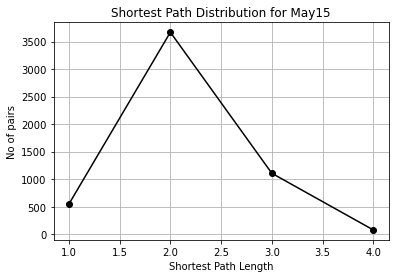



{1: 556, 2: 3747, 3: 1166, 4: 81}
Characteristic Path length for 1506  is  2.139099099099099


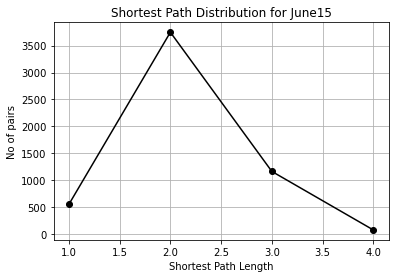



{1: 578, 2: 3784, 3: 1228, 4: 108, 5: 2}
Characteristic Path length for 1507  is  2.152982456140351


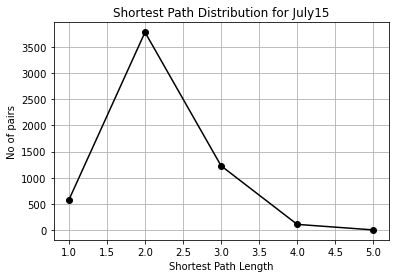



{1: 580, 2: 3824, 3: 1140, 4: 81}
Characteristic Path length for 1508  is  2.1003508771929824


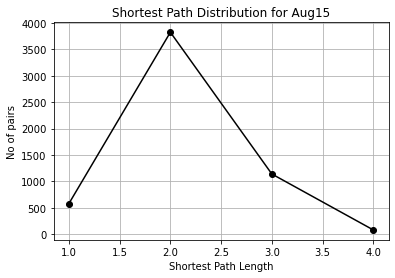



{1: 596, 2: 4221, 3: 1168, 4: 21}
Characteristic Path length for 1509  is  2.1022311022311024


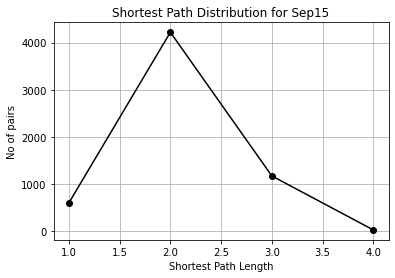



{1: 602, 2: 4076, 3: 1229, 4: 98, 5: 1}
Characteristic Path length for 1510  is  2.1375291375291376


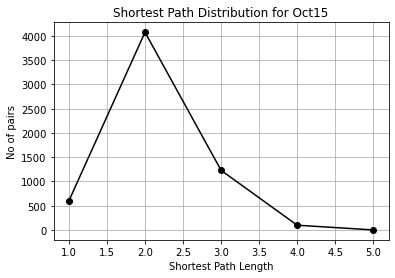



{1: 594, 2: 3874, 3: 1137, 4: 94, 5: 1}
Characteristic Path length for 1511  is  2.1287719298245613


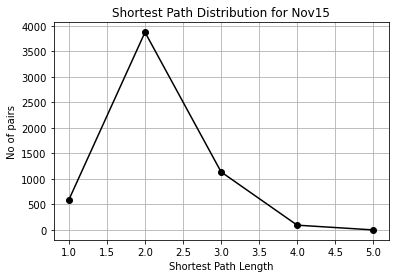



{1: 601, 2: 3952, 3: 906, 4: 17}
Characteristic Path length for 1512  is  2.0344144144144143


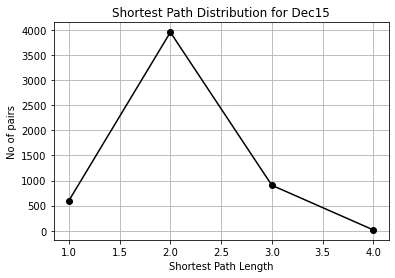



{1: 581, 2: 3970, 3: 909, 4: 16}
Characteristic Path length for 1601  is  2.0381981981981983


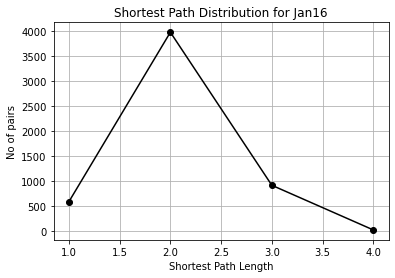



{1: 594, 2: 3924, 3: 868, 4: 16}
Characteristic Path length for 1602  is  2.056645686782673


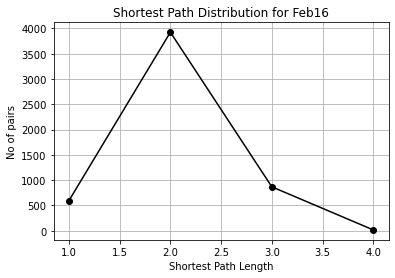



{1: 617, 2: 4042, 3: 875, 4: 16}
Characteristic Path length for 1603  is  2.052252252252252


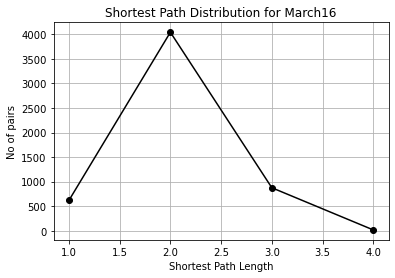



{1: 613, 2: 3787, 3: 868, 4: 60}
Characteristic Path length for 1604  is  1.9875675675675675


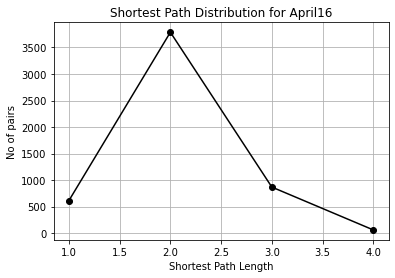



{1: 605, 2: 3818, 3: 855, 4: 50}
Characteristic Path length for 1605  is  1.983063063063063


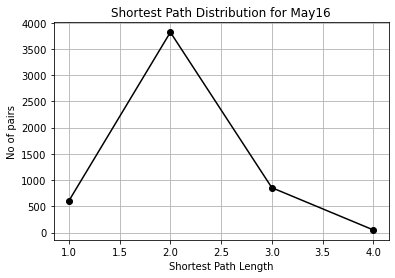



{1: 603, 2: 3672, 3: 730, 4: 35}
Characteristic Path length for 1606  is  1.955289193302892


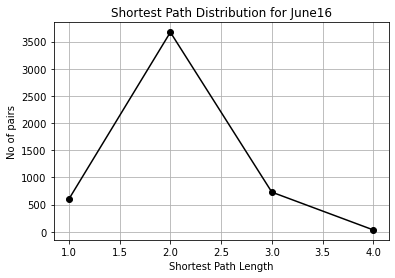



{1: 596, 2: 3554, 3: 714, 4: 35}
Characteristic Path length for 1607  is  1.9534428794992176


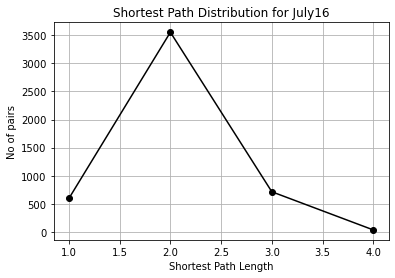



{1: 601, 2: 3643, 3: 929, 4: 82, 5: 1}
Characteristic Path length for 1608  is  2.094178082191781


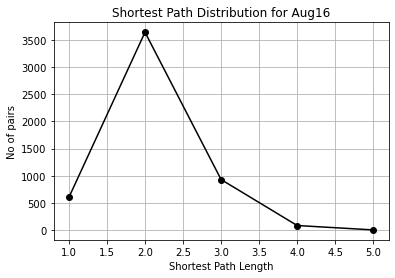



{1: 598, 2: 3665, 3: 912, 4: 80, 5: 1}
Characteristic Path length for 1609  is  2.0907534246575343


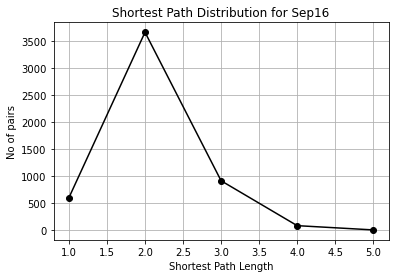



{1: 608, 2: 3672, 3: 842, 4: 60, 5: 1}
Characteristic Path length for 1610  is  1.9850055534987041


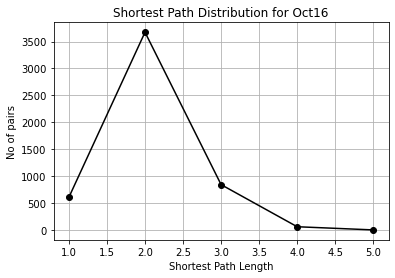



{1: 617, 2: 3734, 3: 1013, 4: 38}
Characteristic Path length for 1611  is  2.087375046279156


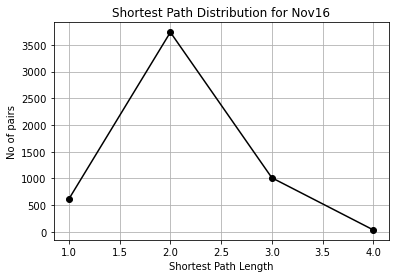



{1: 610, 2: 3847, 3: 1055, 4: 38}
Characteristic Path length for 1612  is  2.093873873873874


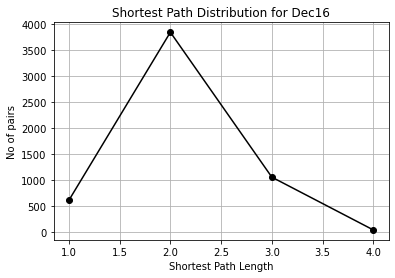



{1: 599, 2: 3829, 3: 955, 4: 19}
Characteristic Path length for 1701  is  2.0729359496482784


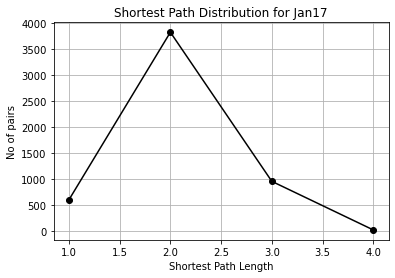



{1: 635, 2: 3970, 3: 927, 4: 18}
Characteristic Path length for 1702  is  2.059099099099099


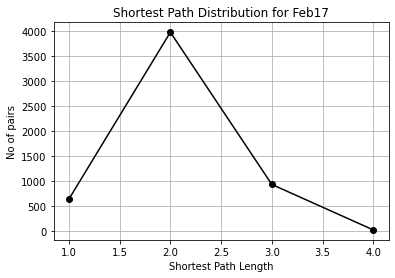



{1: 652, 2: 4092, 3: 940, 4: 16}
Characteristic Path length for 1703  is  2.056140350877193


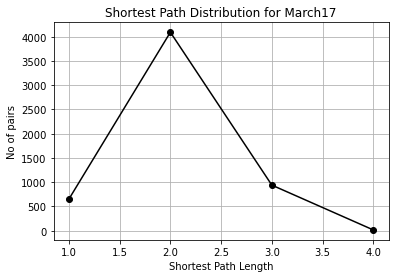



{1: 629, 2: 4215, 3: 1158, 4: 4}
Characteristic Path length for 1704  is  2.089410589410589


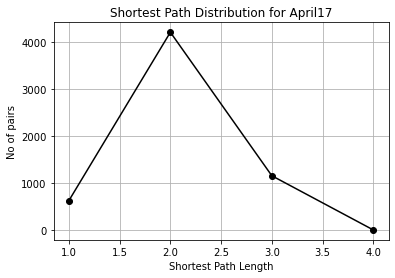



{1: 629, 2: 4251, 3: 1122, 4: 4}
Characteristic Path length for 1705  is  2.083416583416583


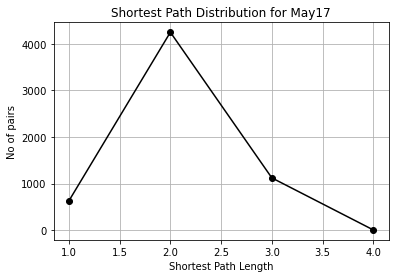



{1: 665, 2: 4190, 3: 1128, 4: 23}
Characteristic Path length for 1706  is  2.084748584748585


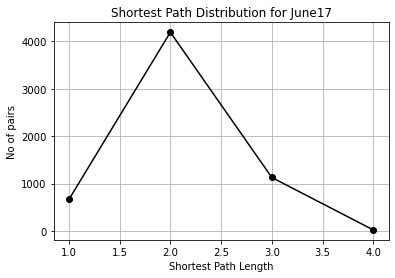



{1: 690, 2: 4381, 3: 1224, 4: 25}
Characteristic Path length for 1707  is  2.0924050632911393


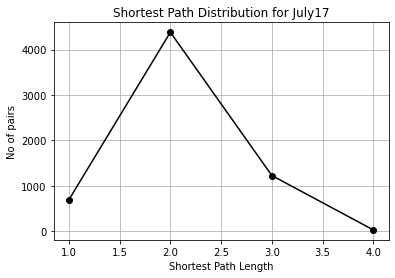



{1: 681, 2: 4314, 3: 1299, 4: 26}
Characteristic Path length for 1708  is  2.106012658227848


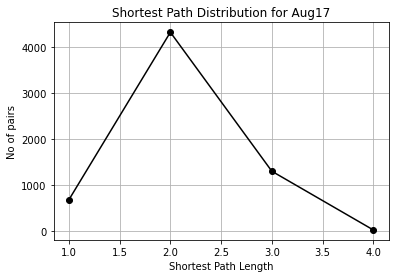



{1: 706, 2: 4659, 3: 1418, 4: 23}
Characteristic Path length for 1709  is  2.1113723185424624


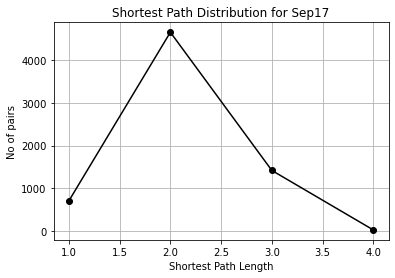



{1: 746, 2: 5029, 3: 1513, 4: 22}
Characteristic Path length for 1710  is  2.1109439124487004


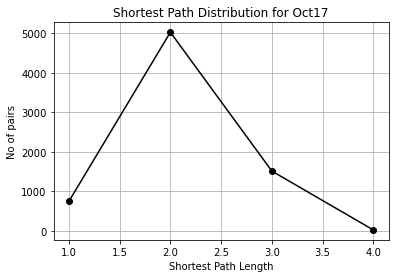



{1: 744, 2: 5076, 3: 1468, 4: 22}
Characteristic Path length for 1711  is  2.105061559507524


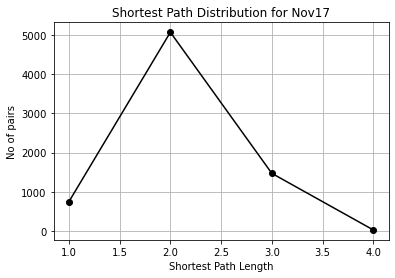



{1: 780, 2: 5219, 3: 1483}
Characteristic Path length for 1712  is  2.0939588345362203


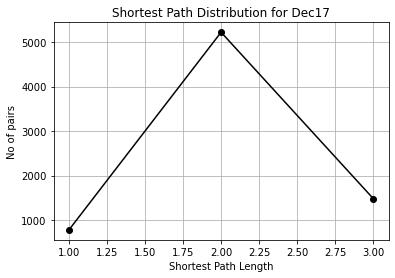



{1: 784, 2: 5235, 3: 1462, 4: 1}
Characteristic Path length for 1801  is  2.090884790163058


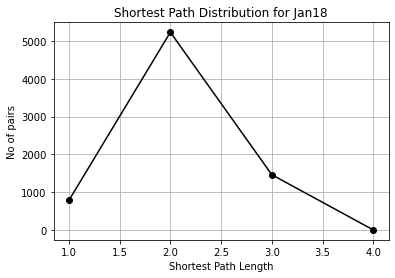



{1: 821, 2: 5440, 3: 1570, 4: 1}
Characteristic Path length for 1802  is  2.095888661899898


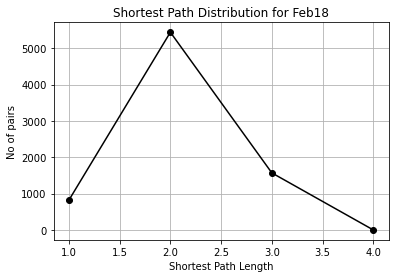



{1: 840, 2: 5581, 3: 1566, 4: 23}
Characteristic Path length for 1803  is  2.096379525593009


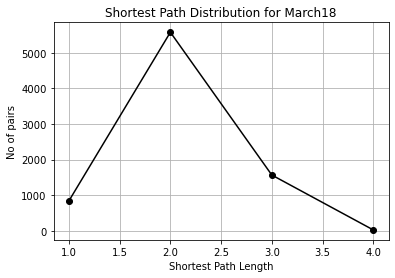



{1: 810, 2: 5966, 3: 1753, 4: 27}
Characteristic Path length for 1804  is  2.116526414212249


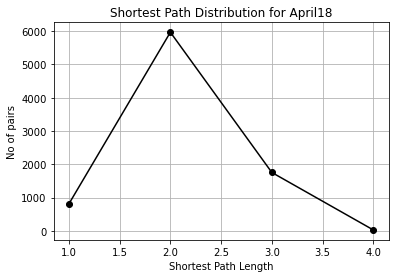



{1: 845, 2: 6303, 3: 1757, 4: 25}
Characteristic Path length for 1805  is  2.107726763717805


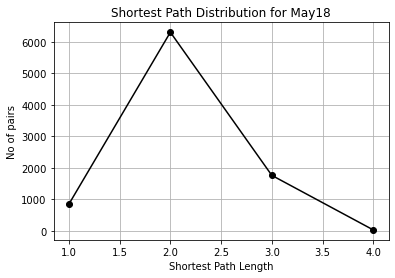



{1: 852, 2: 6216, 3: 1836, 4: 26}
Characteristic Path length for 1806  is  2.116013437849944


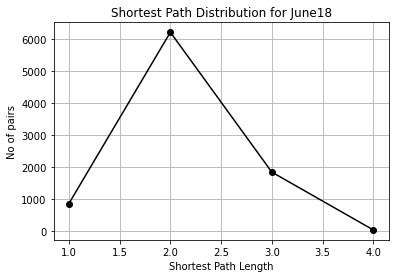



{1: 849, 2: 6295, 3: 1919, 4: 57}
Characteristic Path length for 1807  is  2.1298245614035087


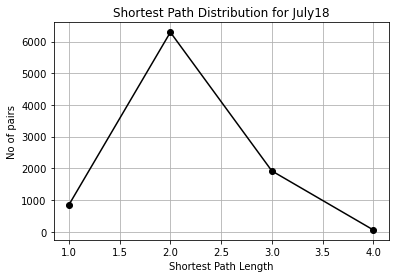



{1: 861, 2: 6325, 3: 2067, 4: 59}
Characteristic Path length for 1808  is  2.1421821305841924


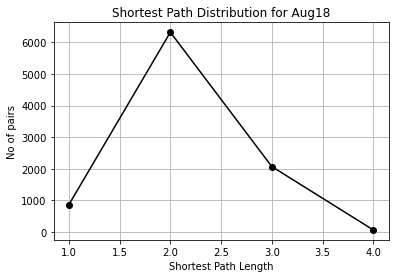



{1: 873, 2: 6333, 3: 2048, 4: 58}
Characteristic Path length for 1809  is  2.138638316151203


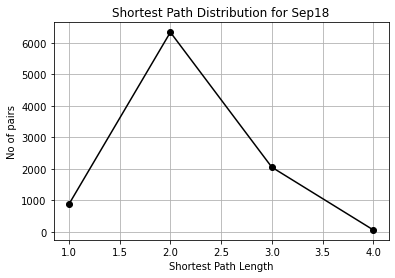



{1: 894, 2: 6406, 3: 1630}
Characteristic Path length for 1810  is  2.0824188129899217


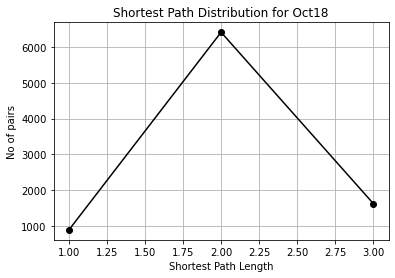



{1: 881, 2: 6074, 3: 1510}
Characteristic Path length for 1811  is  2.008579272477694


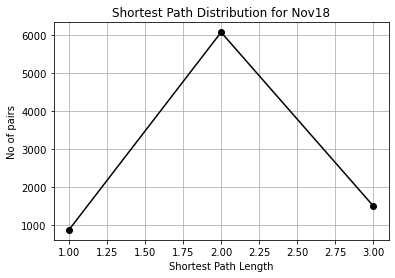



{1: 891, 2: 6326, 3: 1620}
Characteristic Path length for 1812  is  2.017872807017544


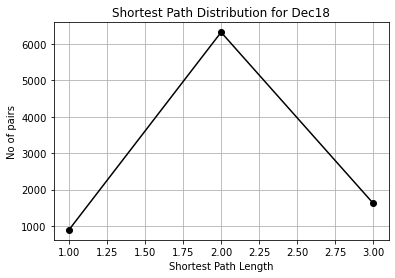



{1: 954, 2: 6648, 3: 1842, 4: 61, 5: 1}
Characteristic Path length for 1901  is  2.106564275194614


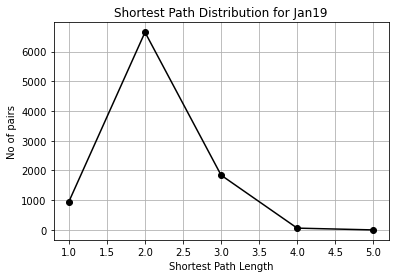



{1: 949, 2: 6393, 3: 1677, 4: 7}
Characteristic Path length for 1902  is  2.0182560137457046


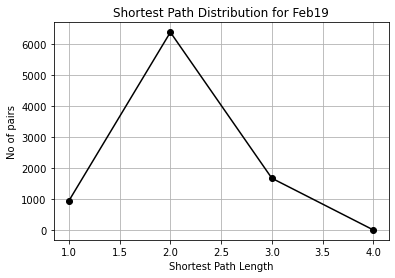



{1: 967, 2: 6584, 3: 1761}
Characteristic Path length for 1903  is  2.085266323024055


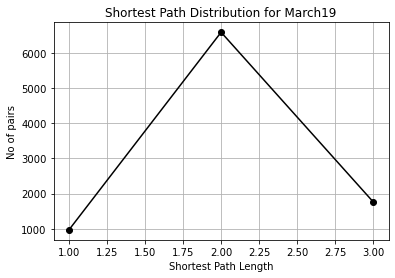



{1: 922, 2: 6586, 3: 1947, 4: 51}
Characteristic Path length for 1904  is  2.118556701030928


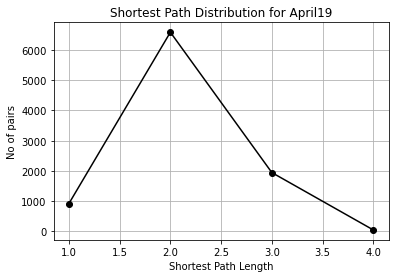



{1: 925, 2: 6610, 3: 1919, 4: 52}
Characteristic Path length for 1905  is  2.115505996212918


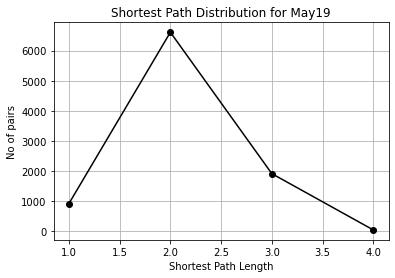



{1: 945, 2: 6528, 3: 1789, 4: 50}
Characteristic Path length for 1906  is  2.1013745704467355


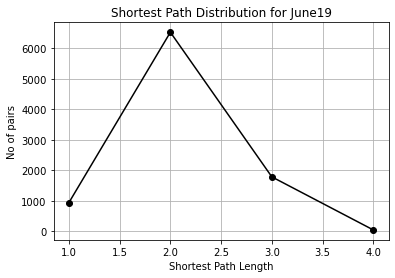



{1: 932, 2: 6494, 3: 1790}
Characteristic Path length for 1907  is  2.071520618556701


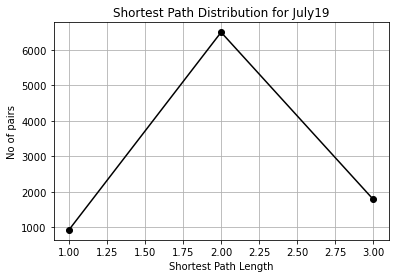



{1: 907, 2: 6584, 3: 1821}
Characteristic Path length for 1908  is  2.098152920962199


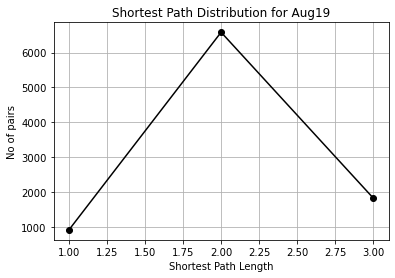



{1: 939, 2: 6830, 3: 1920, 4: 13}
Characteristic Path length for 1909  is  2.103793032364461


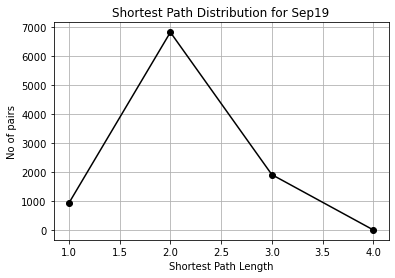



{1: 1025, 2: 6974, 3: 1729, 4: 171, 5: 1}
Characteristic Path length for 1910  is  2.105959595959596


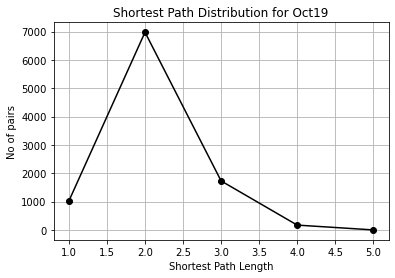



{1: 995, 2: 7084, 3: 1978, 4: 43}
Characteristic Path length for 1911  is  2.1058415841584157


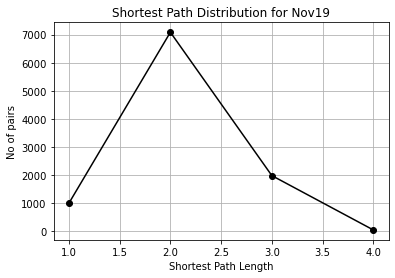



{1: 1005, 2: 7075, 3: 1977, 4: 43}
Characteristic Path length for 1912  is  2.104752475247525


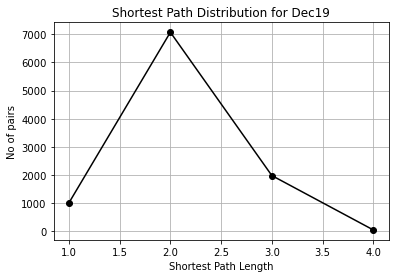



{1: 1008, 2: 7061, 3: 2186, 4: 47}
Characteristic Path length for 2001  is  2.1234711706464764


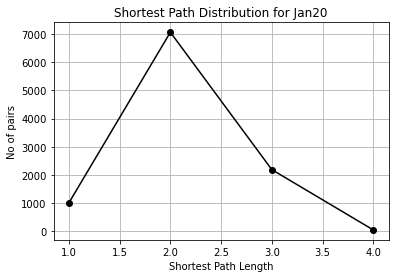



{1: 1017, 2: 7061, 3: 2177, 4: 47}
Characteristic Path length for 2002  is  2.1217239370995924


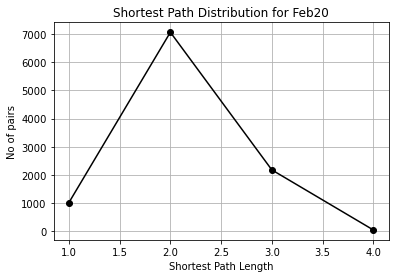



{1: 1033, 2: 7099, 3: 2327, 4: 47}
Characteristic Path length for 2003  is  2.132114981915096


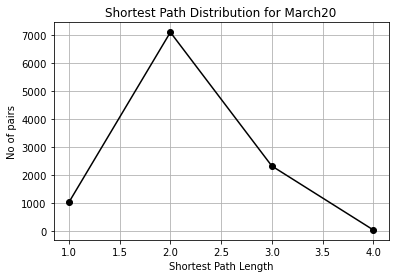



{}
Characteristic Path length for 2004  can't be defined


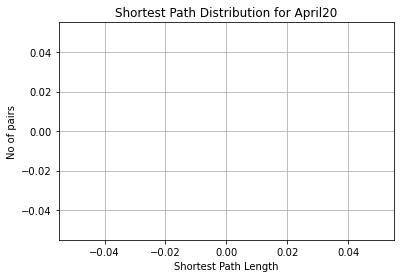



{1: 391, 2: 3617, 3: 2204, 4: 185, 5: 2}
Characteristic Path length for 2005  is  2.256398675097862


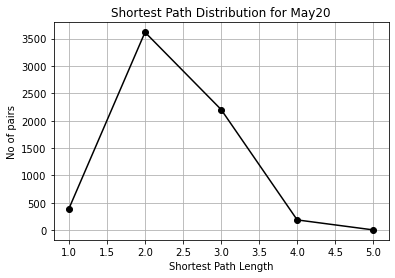



{1: 574, 2: 4600, 3: 2444, 4: 181, 5: 34}
Characteristic Path length for 2006  is  2.247191011235955


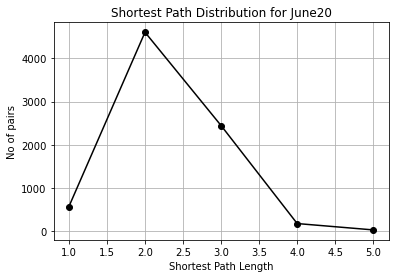



{1: 621, 2: 5319, 3: 2234, 4: 16}
Characteristic Path length for 2007  is  2.153010033444816


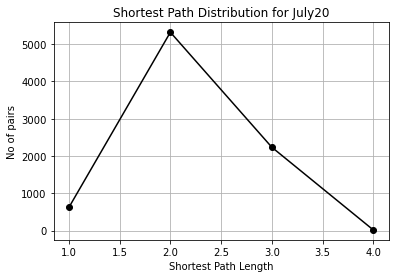



{1: 684, 2: 5330, 3: 1973, 4: 111, 5: 2}
Characteristic Path length for 2008  is  2.163247863247863


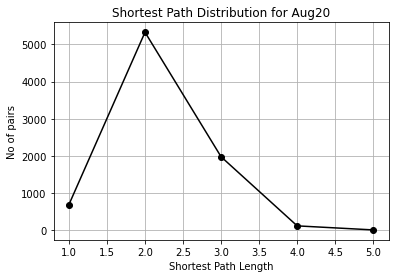



{1: 787, 2: 5909, 3: 1820, 4: 40}
Characteristic Path length for 2009  is  2.130084151472651


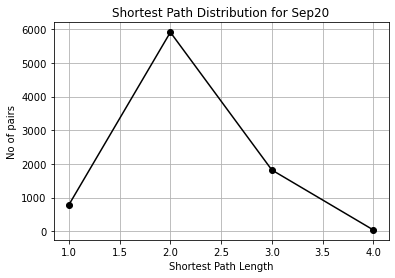



{1: 830, 2: 6286, 3: 1912, 4: 91, 5: 1}
Characteristic Path length for 2010  is  2.138925438596491


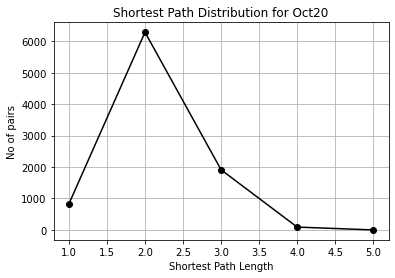

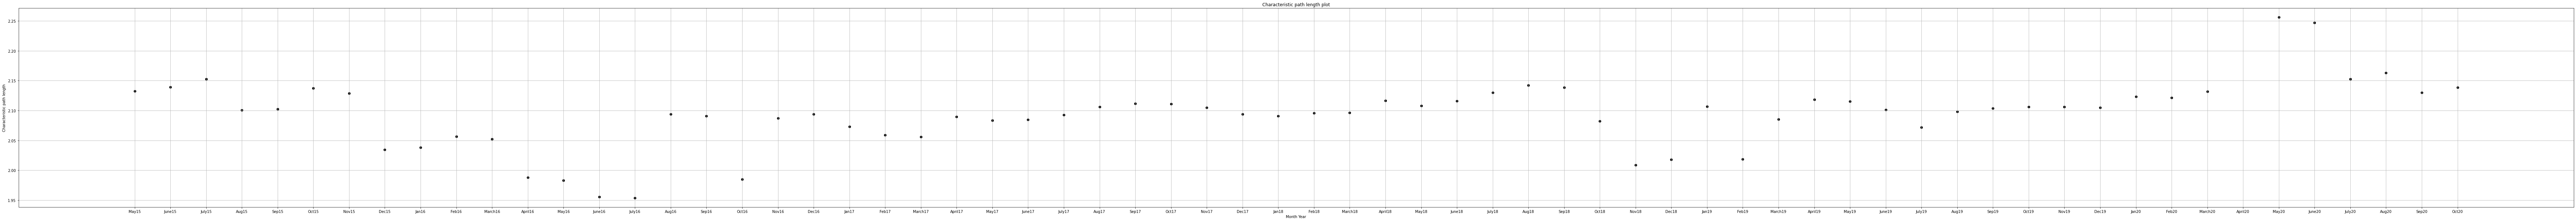

6966

In [6]:
char_path_len_list = []

for i in range(len(graphs)):
    G = graphs[i]
    d_shortest_path = {}
    all_pairs = (nx.all_pairs_shortest_path_length(G,cutoff=None))
    for pair in all_pairs:
#         print(len(pair[1]))
        for dist in pair[1].values():
            if dist != 0:
                if dist in d_shortest_path:
                    d_shortest_path[dist] += 1
                else:
                    d_shortest_path[dist] = 1
                
    print(d_shortest_path)
#     print(sum(d_shortest_path.values()))
    try:
        char_path_len_list.append(nx.average_shortest_path_length(G))
        print("Characteristic Path length for",lbls[i]," is ",char_path_len_list[-1])
#         print("Characteristic Path length for",lbls[i]," is ",nx.average_shortest_path_length(G)) 
    except:
        char_path_len_list.append(None)
        print("Characteristic Path length for",lbls[i]," can't be defined")
        
    plt.figure()
    plt.title("Shortest Path Distribution for " + lbls1[i])
    plt.xlabel("Shortest Path Length")
    plt.ylabel("No of pairs")
    plt.grid(True)
    plt.plot(d_shortest_path.keys(),d_shortest_path.values(), color="black",  marker="o")

    plt.savefig('Output_Files/matplotlib/Shortest_Path_Dist/ ' + lbls1[i])
    plt.show()
    plt.clf()
    plt.close()
    print("\n")
    gc.collect()

plt.figure(figsize = (125, 10))
plt.title("Characteristic path length plot")
plt.xlabel("Month Year")
plt.ylabel("Characteristic path length")
plt.grid(True)
plt.ylim(0,10)
plt.scatter(lbls1, char_path_len_list, color="black",  marker="o")
plt.savefig('Output_Files/matplotlib/Characteristic path length')
plt.show()
plt.clf()
plt.close('all')
gc.collect()



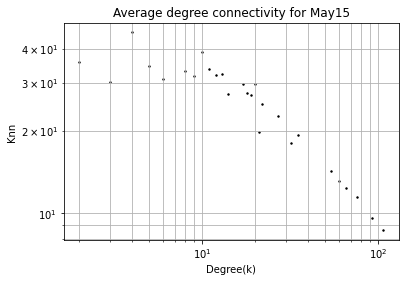

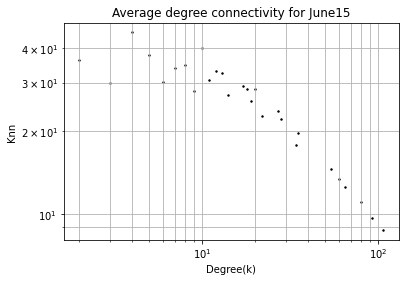

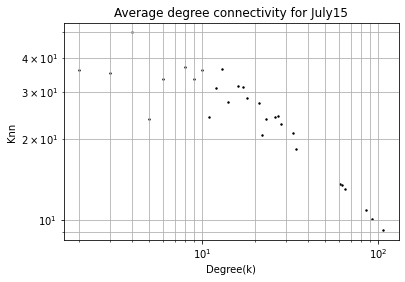

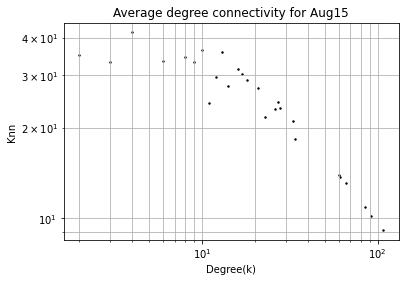

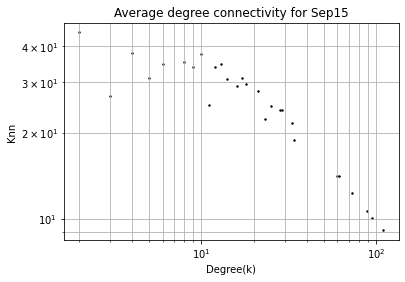

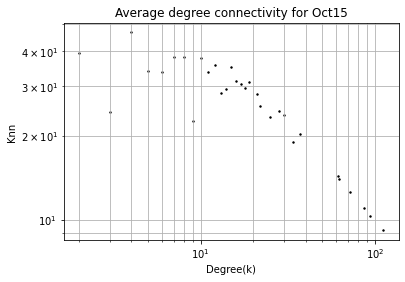

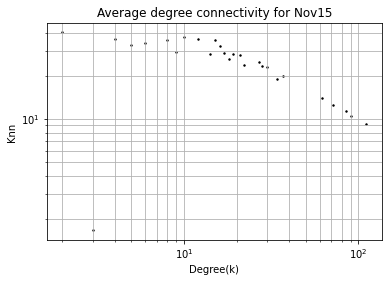

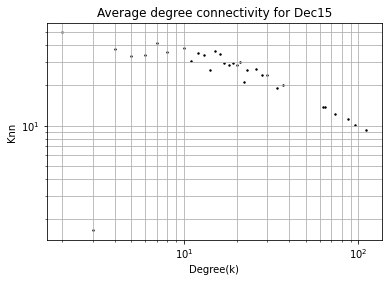

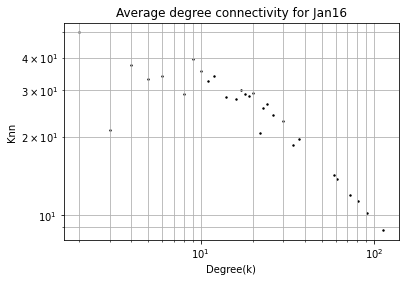

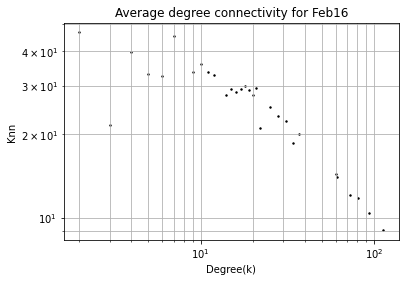

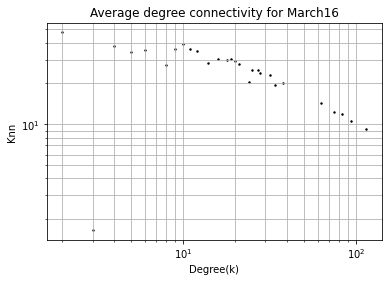

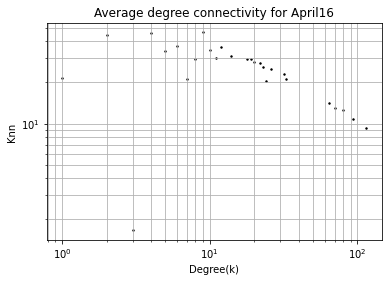

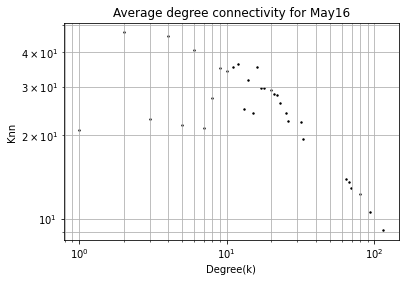

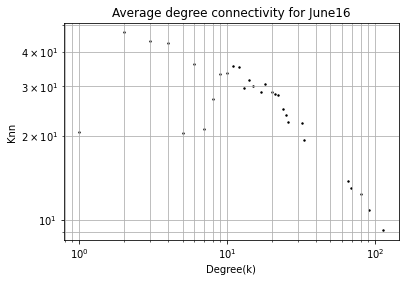

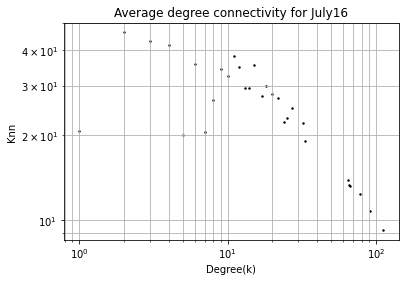

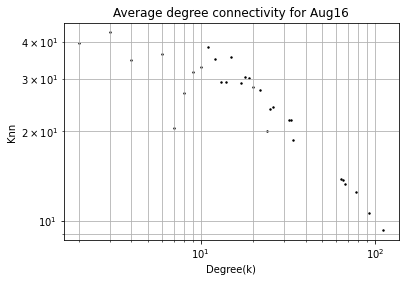

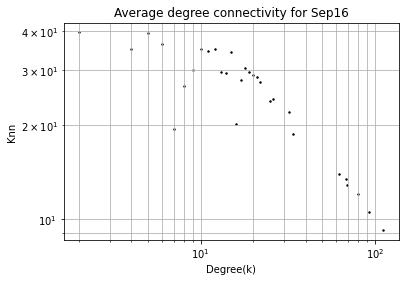

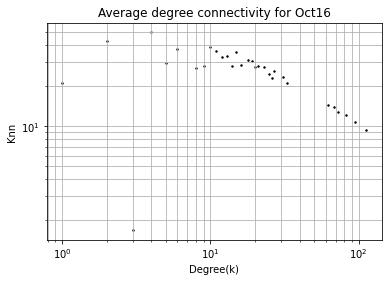

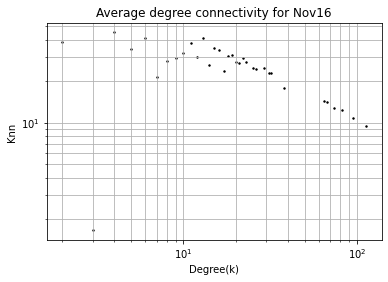

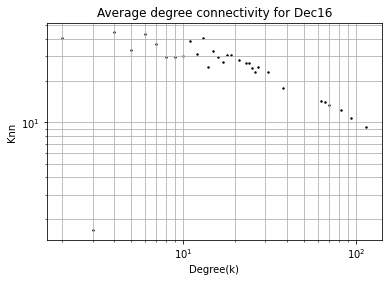

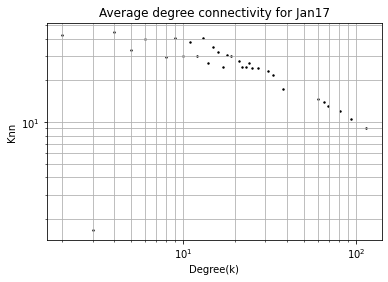

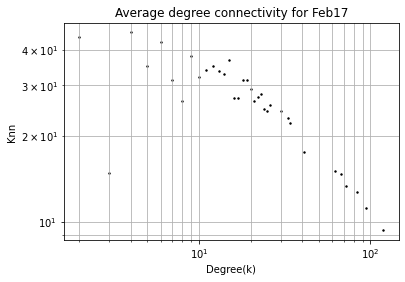

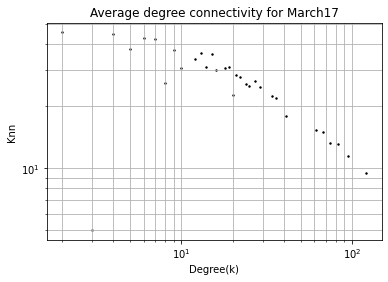

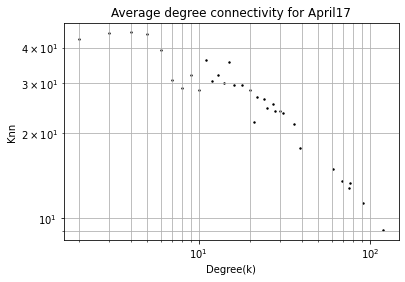

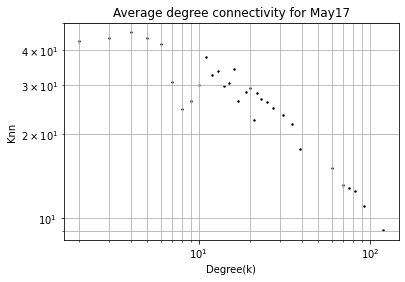

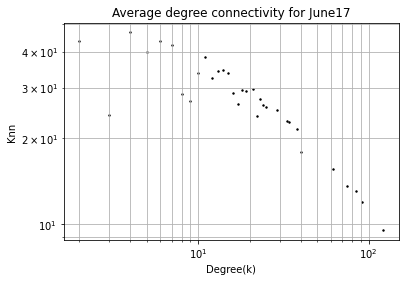

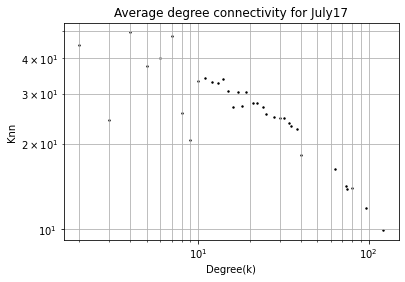

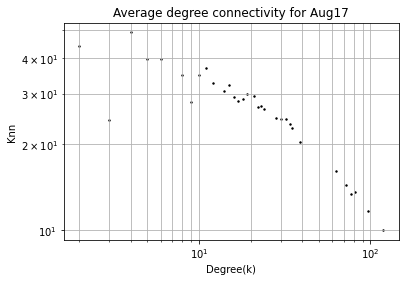

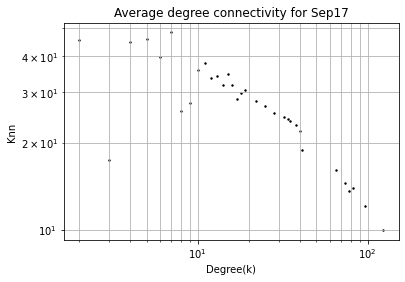

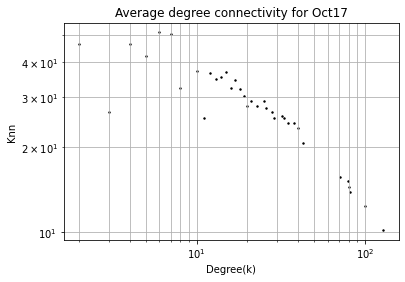

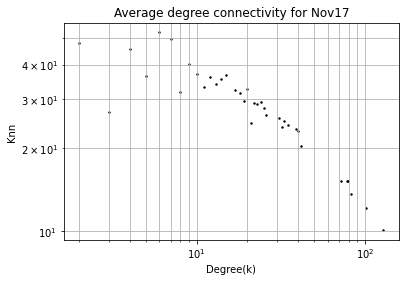

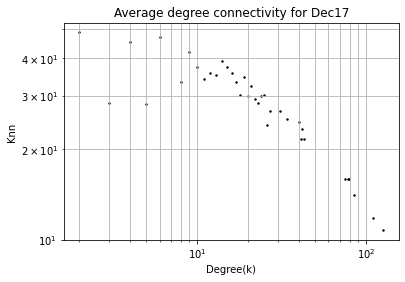

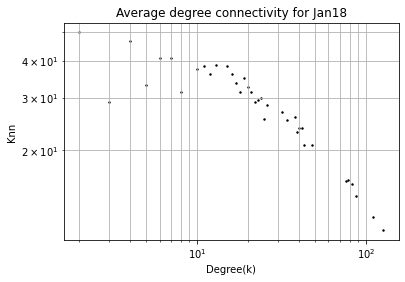

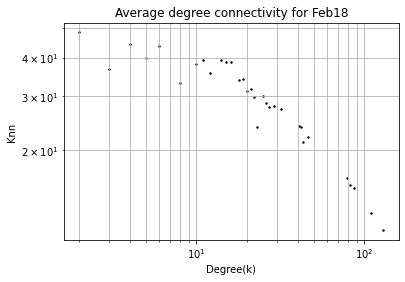

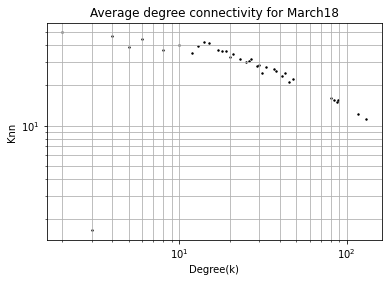

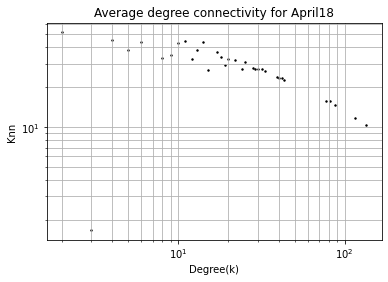

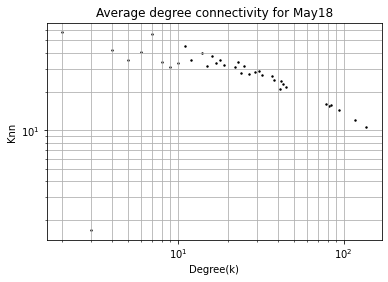

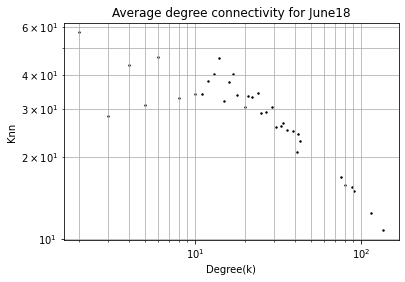

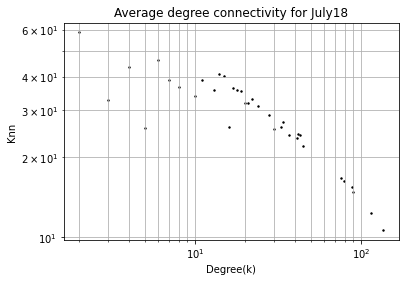

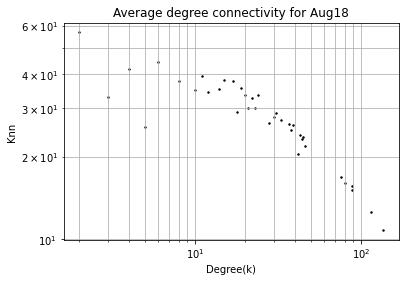

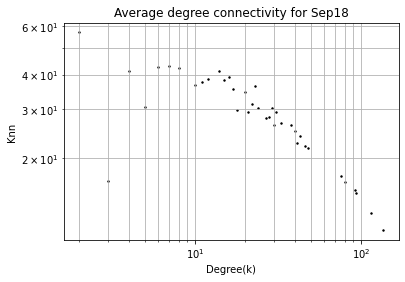

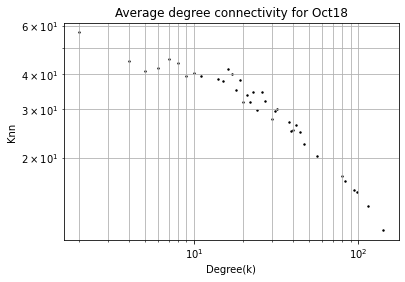

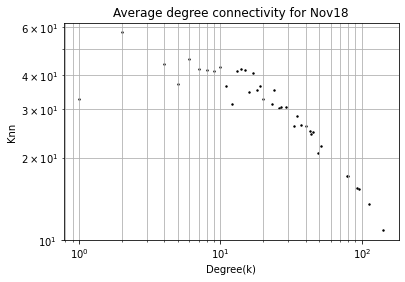

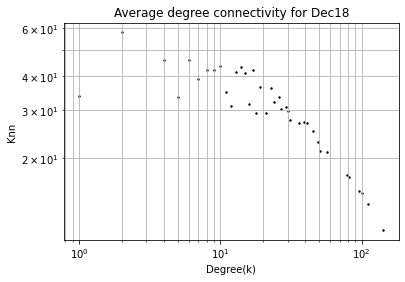

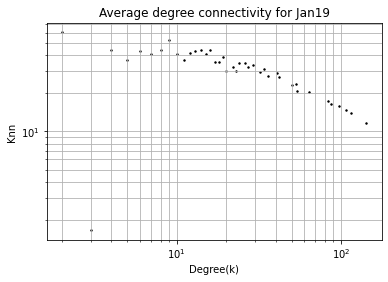

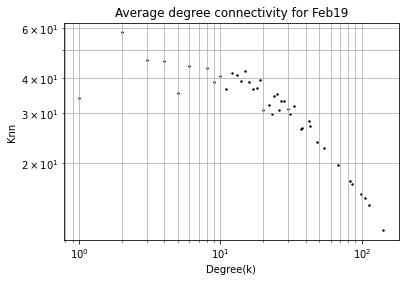

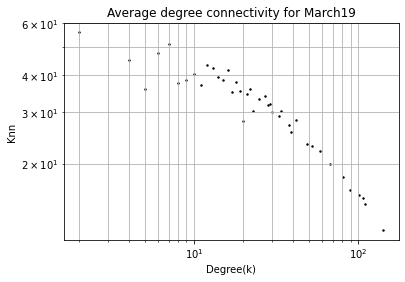

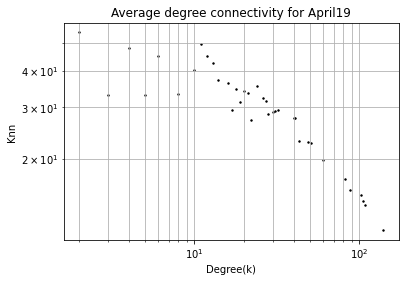

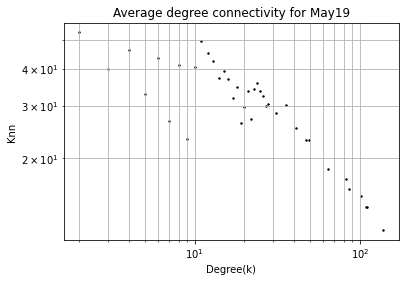

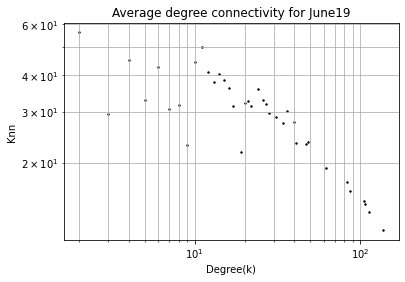

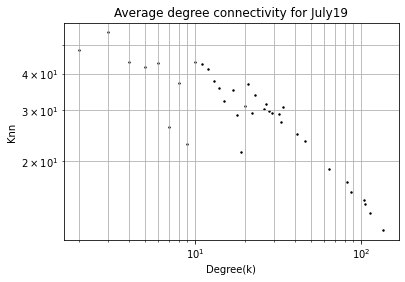

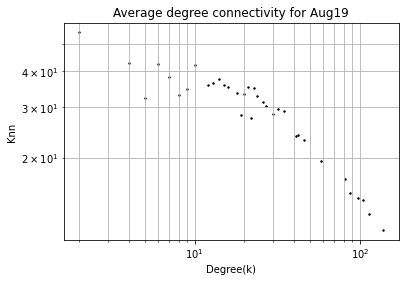

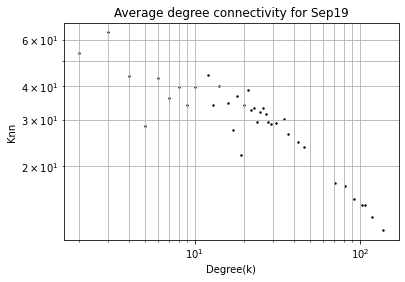

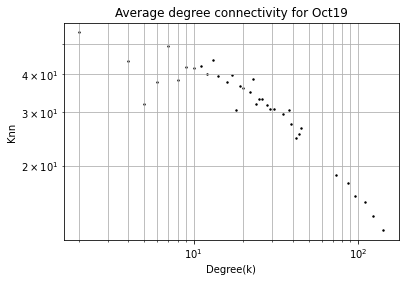

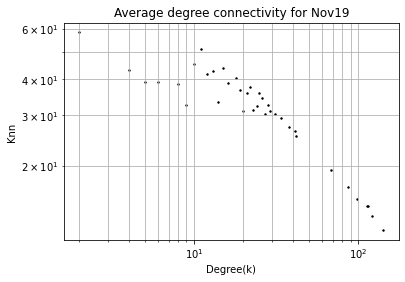

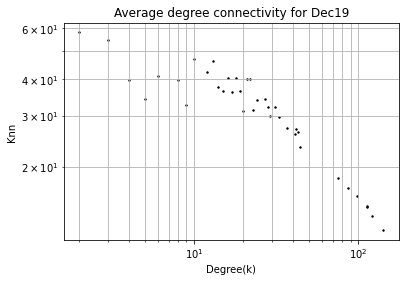

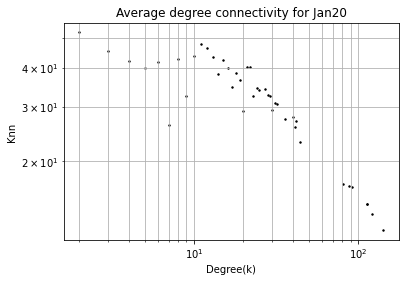

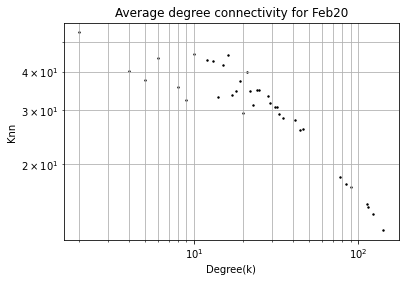

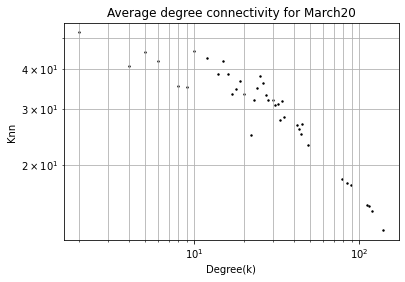

c:\users\juhi pandey\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  del sys.path[0]


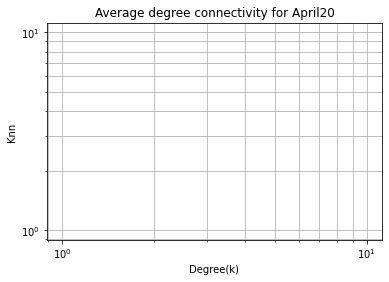

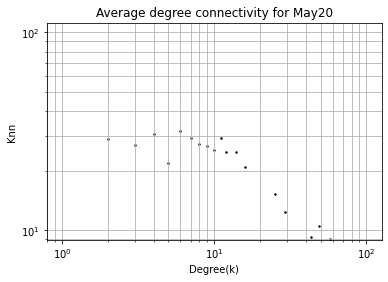

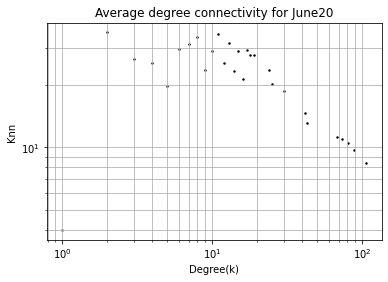

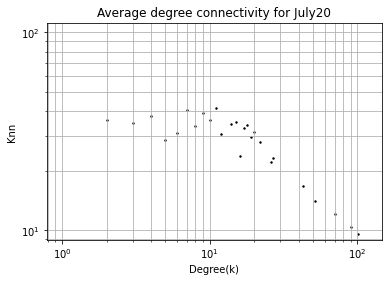

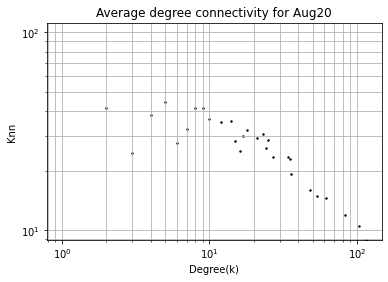

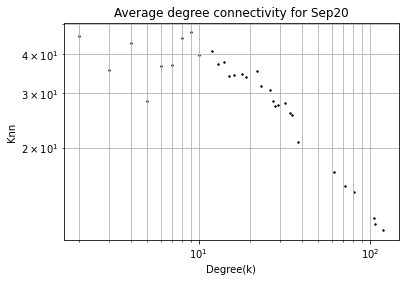

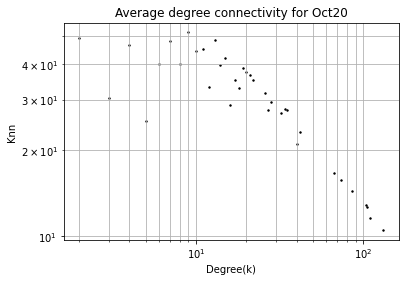

In [27]:
for i in range(len(graphs)):
    G = graphs[i]
    plt.figure()
    plt.title("Average degree connectivity for " + lbls1[i])
    plt.xlabel("Degree(k)")
    plt.ylabel("Knn")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid(True, which="both")
    k_knn = nx.k_nearest_neighbors(G)
    plt.scatter(k_knn.keys(), k_knn.values(), color="black",  marker="o", s=2)
#     plt.xticks([t for t in range(max(k_knn.keys())+1)])        
    plt.savefig('Output_Files/matplotlib/Knn vs k/' + lbls1[i])
    plt.show()
    plt.clf()
    plt.close('all')
    gc.collect()